1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as uni
max_speeds = np.load('max-speeds.npy')
max_speeds_copy=np.copy(max_speeds)
years_nb = max_speeds.shape[0]

#devo costruire la cumulative probability function cioè devo scegliere ciascun valore massimo del vento e vedere la probabilità
#che gli altri massimi siano minori o uguali ad esso(cumulative da x di soglia tale che X(i)<=x e ti calcola p )
#quantile(data p calcola x tale che X(i)<=x con una probabilità pari a p)

cprob = (np.arange(years_nb, dtype=np.float32) + 1) / years_nb
max_speeds_sorted = np.sort(max_speeds)

spline = uni(cprob, max_speeds_sorted)

fifty_prob = 1. - 0.02
fifty_wind = spline(fifty_prob)

print("Maximum wind speed expected in 50 years",np.round(fifty_wind))


Maximum wind speed expected in 50 years 32.0


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Finding parameters for min_temperatures:
9.05 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[0.0517894  0.58830165 1.53763836 1.21574134]
Finding parameters for max_temperatures:
4 ms ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[0.07946777 1.52314707 1.15266577 1.176555  ]
max and min temperatures found
[-59.82444423 -58.89941171 -55.67664774 -47.57616578 -33.32197593
 -17.01584872  -7.98299661 -12.71087612 -27.70674769 -43.44502605
 -53.64493044 -58.19492898]
[16.79422241 18.52314152 21.91401667 27.12249946 33.12457348 37.71396108
 38.7188446  35.61934837 29.97003169 24.1733427  19.88552255 17.44049546]


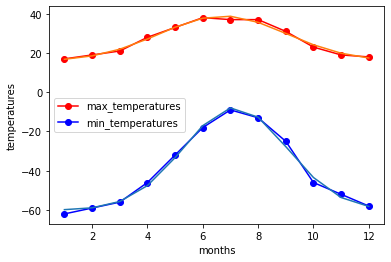

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
import seaborn as sns 
import math as m

months=np.array([i for i in range(1,13)])
max_temperatures=np.array([17,19,21,28,33,38,37,37,31,23,19,18])
min_temperatures=np.array( [-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58] )
plt.plot(months,max_temperatures,"r", marker='o',label="max_temperatures")
plt.plot(months,min_temperatures,"b", marker='o',label="min_temperatures")
plt.legend(loc='best')
plt.xlabel("months")
plt.ylabel("temperatures")

#This is my attempt to find the best fits 
#x=np.linspace(0,13,100)
#ymax=np.array([m.exp(-(6.7-i)**2/10)*(20) + 18 for i in x])
#ymin=np.array([ m.exp(-(7.2-i)**2/6.5)*(53)-60 for i in x])
#plt.plot(x,ymax)
#plt.plot(x,ymin)
#plt.show()

def min_max_fun(X,mu,sigma,a,bias):
    
    Y=[]
    e=m.exp(1)
    for i in range(0,X.shape[0],1):
        aux=m.pow(e,-( (mu-X[i])**2 )/sigma )*a +bias
        Y.append(aux)    
    return Y

print("Finding parameters for min_temperatures:")
popt, pcov =cf(min_max_fun,months,min_temperatures,bounds=[[7.0,6,50,-65],[7.5,7,55,-59]])

%timeit popt, pcov =cf(min_max_fun,months,min_temperatures,bounds=[[7.0,6,50,-65],[7.5,7,55,-59]])

perr = np.sqrt(np.diag(pcov))
print(perr)


y_esp_min=np.array( [ m.exp(-(popt[0]-i)**2/popt[1])*(popt[2])+popt[3] for i in range(1,13,1)] )


print("Finding parameters for max_temperatures:")

popt, pcov =cf(min_max_fun,months,max_temperatures)
%timeit popt, pcov =cf(min_max_fun,months,max_temperatures)

perr = np.sqrt(np.diag(pcov))
print(perr)


y_esp_max=np.array( [ m.exp(-(popt[0]-i)**2/popt[1])*(popt[2])+popt[3] for i in range(1,13,1)] )

print("max and min temperatures found")
print(y_esp_min)
print(y_esp_max)

plt.plot(months,y_esp_min)
plt.plot(months,y_esp_max)
plt.show()


#the fits are very good in my opinion but exist two differents behaviours: the firt is conditional fit because i needed insert
#accurate limits the second,on the contrary nothing.Probably in the second case the minimum absolute temperatures in one year
#and the max of minumum temperatures are not near,in other words,the second dataset is "waste" over wide than first.In fact the 
#first process needs more time than second one.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


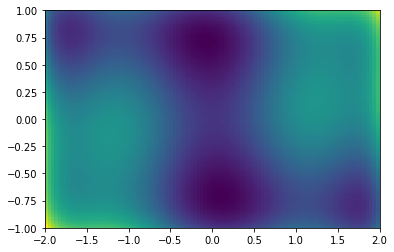

[-0.08984196  0.71265635]  in questo punto f vale : -1.031628  
[ 0.08984195 -0.71265636]  in questo punto f vale : -1.031628 
[-1.7036077   0.79608351]  in questo punto f vale : -0.215464 
[ 1.70360768 -0.79608351]  in questo punto f vale : -0.215464 


In [3]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import root, fsolve
from scipy.optimize import minimize as mize

def f(x,y):
    z=( 4-2.1*x**2+m.pow(x,4)/3 )*x**2 + x*y + (4*y**2-4)*y**2
    return z

#in realtà servirebbe vedere bene le regioni e poi fare le ipotesi

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

X,Y = np.meshgrid(x,y)
Z = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        Z[i,j] = f(X[i,j],Y[i,j])

fig = plt.figure()
plt.pcolor(X, Y, Z)
plt.show()

def g(x):
    z=( 4-2.1*x[0]**2+m.pow(x[0],4)/3 )*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2
    return z

solution1 = mize( g, x0=(0.0,0.75) ,bounds=( (-0.5,0.5),(-1,1) ) )

solution2 =mize( g, x0=(0.0,-0.75), bounds=( (-0.5,0.5),(-1,1) ) ) 

solution3 =mize( g, x0=(-1.7,0.75), bounds=( (-2.0,-1.5),(0.50,1) ) ) 

solution4 =mize( g,x0=(1.7,-0.75), bounds=( (1.5,2.0),(-1,-0.50) ) )

solution_random= mize(g,x0=(0,0.0))


print(solution1.x," in questo punto f vale : %f  " % (f(solution1.x[0],solution1.x[1]) ) ) 
print(solution2.x," in questo punto f vale : %f " % (f(solution2.x[0],solution2.x[1]) ) )
print(solution3.x," in questo punto f vale : %f " % ( f(solution3.x[0],solution3.x[1]) ) )
print(solution4.x," in questo punto f vale : %f " % ( f(solution4.x[0],solution4.x[1]) ) )
#print(solution_random.x)

#i found 4 minimum points but probably (0.0) is a seddle point
#the absolute minimum is at (-0.08984196,0.71265635) and noticed that function is simmetric also (0.08984196,-0.71265635)

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

File originale : 


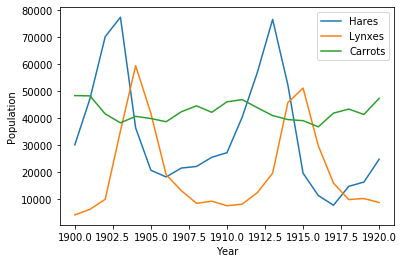

ricostruzione del segnale delle popolazioni delle lepri e delle linci


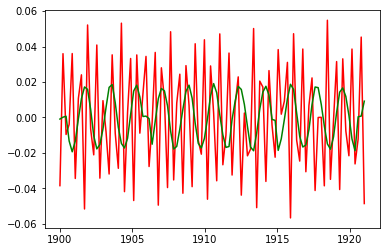

composizione in frequenza della popolazione delle lepri


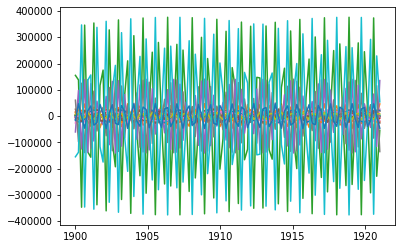

composizione in frequenza della popolazione delle linci


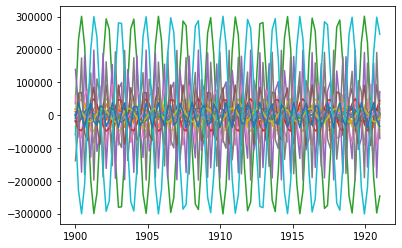

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import fftpack
from scipy.interpolate import UnivariateSpline as uni

data = np.loadtxt('populations.txt')
#print(data[:,1:3].shape)
fourier_data=fftpack.fft2(data[:,1:3])
#print(fourier_data.shape)
#fourier_freq=np.array(fftpack.fftfreq(fourier_data.size)).reshape(fourier_data.shape)
#print(fourier_freq)
modulo=np.zeros(fourier_data.shape)
frequenza=np.zeros(fourier_data.shape)

for j in range(fourier_data.shape[1]):
    for i in range(fourier_data.shape[0]):
        modulo[i][j]=np.linalg.norm(fourier_data[i][j])  #modulo di entrambe :cioè sia delle linci sia delle lepri
        frequenza[i][j]=np.imag(fourier_data[i][j])      #frequenze di entrambe :cioè sia delle linci che delle lepri

x=np.linspace(1900,1921,100)
aux=np.zeros(fourier_data.shape[0]*x.size).reshape(fourier_data.shape[0],x.size)
aux2=np.zeros(fourier_data.shape[0]*x.size).reshape(fourier_data.shape[0],x.size)
#print(x)

for i in range(fourier_data.shape[0]):
    for j in range(x.size):
        aux[i][j]=modulo[i][0]*np.sin(frequenza[i][0]*x[j])   #adesso per ogni modulo e ogni frequenza so come è l'andamento
                                                                #per hares


for i in range(fourier_data.shape[0]):  #adesso per ogni modulo e ogni frequenza so come è l'andamento per lynxs
    for j in range(x.size):
        aux2[i][j]=modulo[i][1]*np.sin(frequenza[i][1]*x[j])

somma_modulo_frequenza_hares=np.zeros(x.size).reshape(1,x.size)
somma_modulo_frequenza_lynxes=np.zeros(x.size).reshape(1,x.size)


for j in range(x.size):  # sommo su ogni colonna per hares
    for i in range(fourier_data.shape[0]):
        somma_modulo_frequenza_hares[0][j]+=aux[i][j]
        somma_modulo_frequenza_lynxes[0][j]+=aux2[i][j]
        
print("File originale : ")

data_from_file = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data_from_file.T


plt.plot(year, hares, label='Hares')
plt.plot(year, lynxes, label='Lynxes')
plt.plot(year, carrots, label='Carrots')
plt.ylabel("Population")
plt.xlabel("Year")
plt.legend()
plt.show()

print("ricostruzione del segnale delle popolazioni delle lepri e delle linci")

plt.plot(x,somma_modulo_frequenza_hares[0,:],color="red",label="hares")
plt.plot(x,somma_modulo_frequenza_lynxes[0,:],color="green",label="lynxes")
plt.show()

print("composizione in frequenza della popolazione delle lepri")
for i in range(fourier_data.shape[0]):
     plt.plot(x,modulo[i][0]*np.sin(frequenza[i][0]*x)    )
        
plt.show()

print("composizione in frequenza della popolazione delle linci")
for i in range(fourier_data.shape[0]):
     plt.plot(x,modulo[i][1]*np.sin(frequenza[i][1]*x)    )

plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

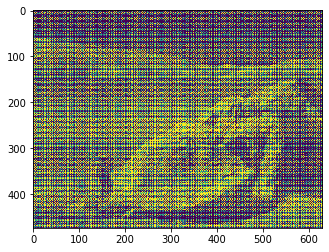

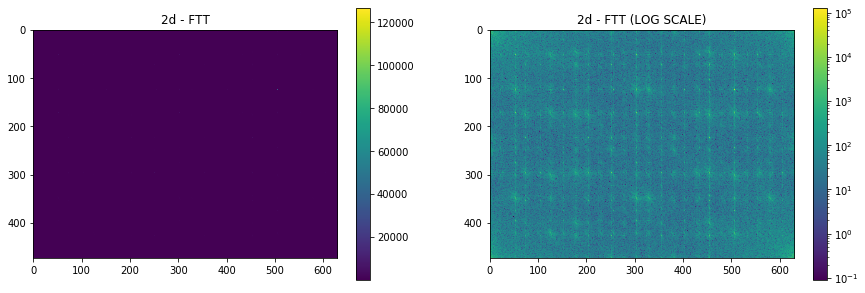

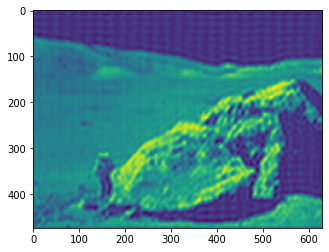

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import linalg as la
from matplotlib import colors

moon=plt.imread("moonlanding.png")


ft=fftpack.fft2(moon)
prova=fftpack.ifft2(ft)
plt.imshow(np.real(prova))


power = np.abs(ft)


fig, ax = plt.subplots( 1, 2, figsize = (15 , 5))

im0 = ax[0].imshow(power)
fig.colorbar(im0, ax = ax[0])
ax[0].set_title("2d - FTT")

#can't see anything, need to plot the log of the modulus
im1 = ax[1].imshow(power, norm=colors.LogNorm() )
fig.colorbar(im1, ax = ax[1])
ax[1].set_title("2d - FTT (LOG SCALE)")

plt.show()



xbound, ybound = 30, 50
high_freq_fft=ft.copy()
high_freq_fft[xbound:-xbound] = 0 
high_freq_fft[:,ybound:-ybound] = 0 



            
filtered_sig = fftpack.ifft2(high_freq_fft).real

plt.imshow(np.real(filtered_sig))
            



